In [1]:
from google.colab import files
u = files.upload()

Saving houston_data_07102020.csv to houston_data_07102020.csv


In [2]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import os
import string
import csv

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import missingno
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.subplots
import plotly.graph_objects as go

In [3]:
! pip install "tensorflow>=2.0.0"
! pip install --upgrade tensorflow-hub

     |████████████████████████████████| 462 kB 20.8 MB/s 


In [4]:
import tensorflow

In [5]:
# Model prediction
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras import backend, models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM

In [6]:
df = pd.read_csv('houston_data_07102020.csv', 
                    header = 0, 
                    engine='python')

pd.set_option('display.max_columns', None)   

In [7]:
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,EVAP,MDPR,PGTM,PRCP,RAIN,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,WDF2,WDF5,WESD,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT10,WT11
0,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/1/2016,12.53,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,48,51,45,NaN,30,30.0,NaN,NaN,21.0,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/2/2016,6.49,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,47,51,45,NaN,10,360.0,NaN,NaN,14.1,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/3/2016,5.59,NaN,NaN,NaN,NaN,0.07,1,0.0,0.0,49,62,43,NaN,310,310.0,NaN,NaN,12.1,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/4/2016,4.92,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,49,62,38,NaN,30,20.0,NaN,NaN,10.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/5/2016,6.71,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,45,55,34,NaN,80,80.0,NaN,NaN,14.1,18.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/5/2020,5.82,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,86,96,79,NaN,220,230.0,NaN,NaN,14.1,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/6/2020,6.04,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,86,91,82,NaN,260,250.0,NaN,NaN,15.0,21.9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1649,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/7/2020,5.59,NaN,NaN,NaN,NaN,0.56,1,0.0,0.0,86,94,80,NaN,350,190.0,NaN,NaN,19.9,23.9,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1650,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/8/2020,7.61,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,87,96,82,NaN,150,180.0,NaN,NaN,14.1,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    1652 non-null   object 
 1   NAME       1652 non-null   object 
 2   LATITUDE   1652 non-null   float64
 3   LONGITUDE  1652 non-null   float64
 4   ELEVATION  1652 non-null   int64  
 5   DATE       1652 non-null   object 
 6   AWND       1652 non-null   float64
 7   DAPR       0 non-null      float64
 8   EVAP       0 non-null      float64
 9   MDPR       0 non-null      float64
 10  PGTM       22 non-null     float64
 11  PRCP       1652 non-null   float64
 12  RAIN       1652 non-null   int64  
 13  SNOW       1652 non-null   float64
 14  SNWD       1652 non-null   float64
 15  TAVG       1652 non-null   int64  
 16  TMAX       1652 non-null   int64  
 17  TMIN       1652 non-null   int64  
 18  TOBS       0 non-null      float64
 19  WDF2       1652 non-null   int64  
 20  WDF5    

In [9]:
df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'DAPR', 'EVAP', 'MDPR', 'PGTM', 'PRCP', 'RAIN', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'TOBS', 'WDF2', 'WDF5', 'WESD', 'WESF', 'WSF2', 'WSF5',
       'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT10', 'WT11'],
      dtype='object')

In [10]:
df.rename(columns = {'AWND': 'WINDAVG',
                     'PRCP': 'PRECIPITATION',
                     'TAVG': 'TEMPAVG_F', 
                     'TMAX': 'TEMPMAX_F', 
                     'TMIN': 'TEMPMIN_F'}, inplace=True)

In [11]:
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,WINDAVG,DAPR,EVAP,MDPR,PGTM,PRECIPITATION,RAIN,SNOW,SNWD,TEMPAVG_F,TEMPMAX_F,TEMPMIN_F,TOBS,WDF2,WDF5,WESD,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT10,WT11
0,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/1/2016,12.53,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,48,51,45,NaN,30,30.0,NaN,NaN,21.0,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/2/2016,6.49,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,47,51,45,NaN,10,360.0,NaN,NaN,14.1,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/3/2016,5.59,NaN,NaN,NaN,NaN,0.07,1,0.0,0.0,49,62,43,NaN,310,310.0,NaN,NaN,12.1,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/4/2016,4.92,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,49,62,38,NaN,30,20.0,NaN,NaN,10.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/5/2016,6.71,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,45,55,34,NaN,80,80.0,NaN,NaN,14.1,18.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/5/2020,5.82,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,86,96,79,NaN,220,230.0,NaN,NaN,14.1,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/6/2020,6.04,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,86,91,82,NaN,260,250.0,NaN,NaN,15.0,21.9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1649,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/7/2020,5.59,NaN,NaN,NaN,NaN,0.56,1,0.0,0.0,86,94,80,NaN,350,190.0,NaN,NaN,19.9,23.9,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1650,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/8/2020,7.61,NaN,NaN,NaN,NaN,0.00,0,0.0,0.0,87,96,82,NaN,150,180.0,NaN,NaN,14.1,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isna().sum()

STATION             0
NAME                0
LATITUDE            0
LONGITUDE           0
ELEVATION           0
DATE                0
WINDAVG             0
DAPR             1652
EVAP             1652
MDPR             1652
PGTM             1630
PRECIPITATION       0
RAIN                0
SNOW                0
SNWD                0
TEMPAVG_F           0
TEMPMAX_F           0
TEMPMIN_F           0
TOBS             1652
WDF2                0
WDF5               13
WESD             1652
WESF             1652
WSF2                0
WSF5               13
WT01              907
WT02             1532
WT03             1308
WT04             1646
WT05             1647
WT06             1651
WT08             1484
WT10             1652
WT11             1652
dtype: int64

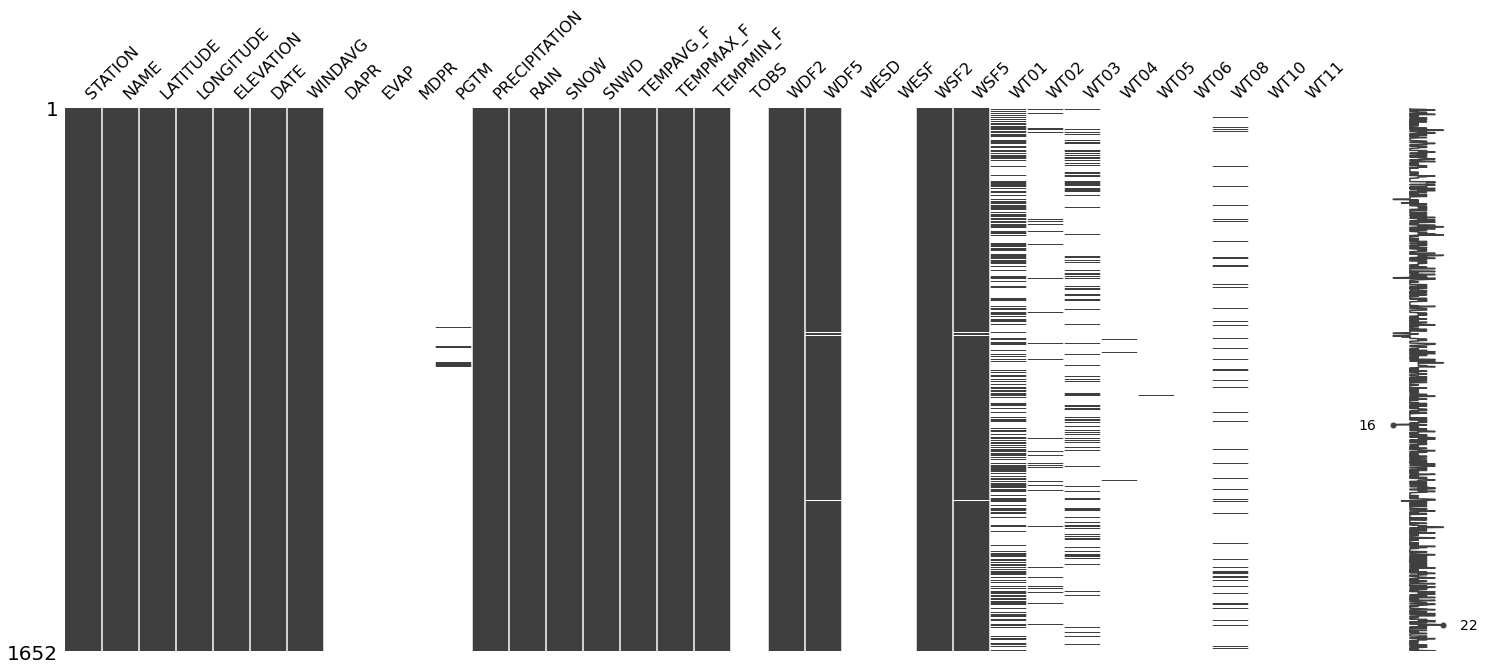

In [13]:
# Visualizing missing data with “missingno” package
missingno.matrix(df)

In [14]:
df1 = df.drop(['DAPR', 'EVAP', 'MDPR', 'PGTM', 'SNOW', 'SNWD', 'TOBS', 
               'WDF2', 'WDF5', 'WESD', 'WESF', 'WSF2', 'WSF5', 'WT01',
               'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT10',
               'WT11'], axis=1)

In [15]:
df1.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'WINDAVG', 'PRECIPITATION', 'RAIN', 'TEMPAVG_F', 'TEMPMAX_F',
       'TEMPMIN_F'],
      dtype='object')

In [16]:
df1

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,WINDAVG,PRECIPITATION,RAIN,TEMPAVG_F,TEMPMAX_F,TEMPMIN_F
0,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/1/2016,12.53,0.00,0,48,51,45
1,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/2/2016,6.49,0.00,0,47,51,45
2,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/3/2016,5.59,0.07,1,49,62,43
3,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/4/2016,4.92,0.00,0,49,62,38
4,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,1/5/2016,6.71,0.00,0,45,55,34
...,...,...,...,...,...,...,...,...,...,...,...,...
1647,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/5/2020,5.82,0.00,0,86,96,79
1648,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/6/2020,6.04,0.00,0,86,91,82
1649,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/7/2020,5.59,0.56,1,86,94,80
1650,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98,-95.36,29,7/8/2020,7.61,0.00,0,87,96,82


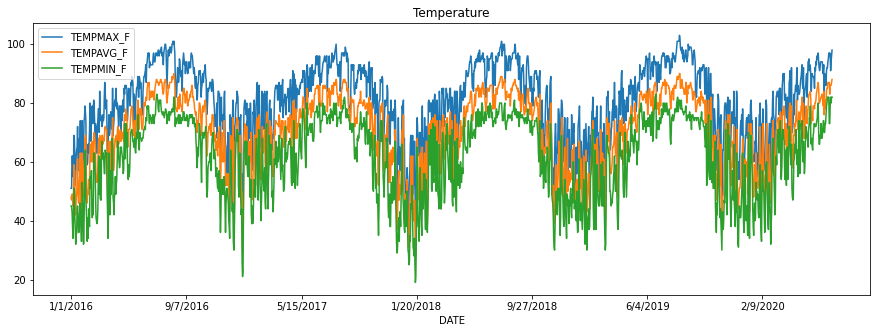

In [17]:
df1.plot(x='DATE', y=['TEMPMAX_F', 'TEMPAVG_F', 'TEMPMIN_F'], figsize=(15,5),
         title='Temperature')

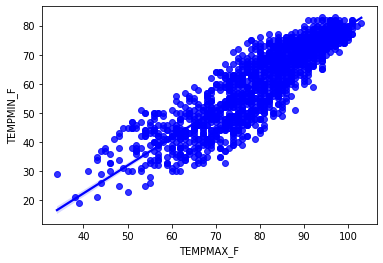

In [18]:
sns.regplot(x = 'TEMPMAX_F', y = 'TEMPMIN_F', color="b", data = df1)

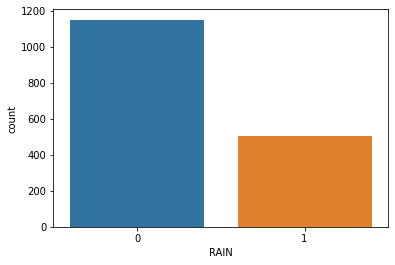

In [19]:
# Plot the Rain column (0 = no rain, 1 = rain)
sns.countplot(data = df1, x='RAIN')

In [20]:
# Visualing the Precipitation
fig = go.Figure(data=[go.Scatter(x=df1['DATE'], y=df1['PRECIPITATION'])],
                layout=go.Layout(title=go.layout.Title(text='Precipitation - Rain in Inches')))

fig.show()


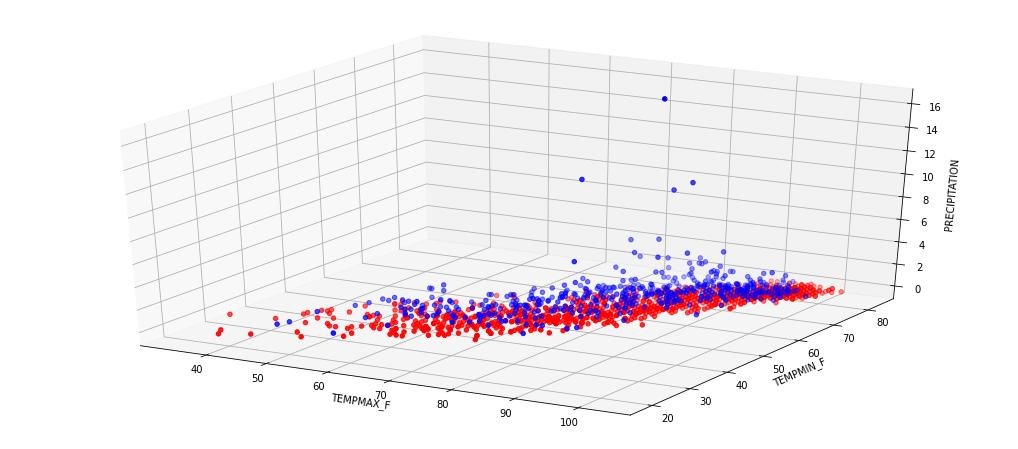

In [21]:
# 3D plot visualization of the weather condition
df1_plot = df1[['PRECIPITATION','TEMPMAX_F','TEMPMIN_F','RAIN']]
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('TEMPMAX_F')
ax.set_ylabel('TEMPMIN_F')
ax.set_zlabel('PRECIPITATION')
ax.scatter(df1_plot[df1_plot.RAIN == 0]['TEMPMAX_F'],
           df1_plot[df1_plot.RAIN == 0]['TEMPMIN_F'],
           df1_plot[df1.RAIN == 0]['PRECIPITATION'],marker="o",color="red")
ax.scatter(df1_plot[df1.RAIN == 1]['TEMPMAX_F'],
           df1_plot[df1.RAIN == 1]['TEMPMIN_F'],
           df1_plot[df1.RAIN == 1]['PRECIPITATION'],marker="o",color="blue");

***As shown on the 3D plot:
Blue dots = It rained when the preciptation (in Inches) increased
Red dots = It didn't rain when the precipitation (in Inches) at low level***



In [22]:
df1.loc[:,'DATE'] = pd.to_datetime(df['DATE'])

In [23]:
# Now extract year and month from datetime
df1['YEAR'] = df1['DATE'].dt.year
df1['MONTH'] = df1['DATE'].dt.month

In [24]:
df1["RAIN"].value_counts()


0    1150
1     502
Name: RAIN, dtype: int64

In [25]:
# Plot the yearly total rain
fig = py.subplots.make_subplots(1,2, subplot_titles=['Total Rain in Year', 
                                                     'Median rain on a rainy day of each Year'])

temp = df1.groupby(by=['YEAR'])['PRECIPITATION'].sum().reset_index()
trace0 = go.Scatter(x=temp['YEAR'], y=temp['PRECIPITATION'])
temp = df1.groupby(by=['YEAR'])['PRECIPITATION'].median().reset_index()
trace1 = go.Scatter(x=temp['YEAR'], y=temp['PRECIPITATION'])
fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)

fig.show()

In [26]:
# Plot the monthly rain
fig = py.subplots.make_subplots(1,2, subplot_titles=['Monthly Rain Totals - inches', 
                                                     'Median rain on a rainy day'])

temp = df1.groupby(by=['MONTH'])['PRECIPITATION'].sum().reset_index()
trace0 = go.Scatter(x=temp['MONTH'], y=temp['PRECIPITATION'])
temp = df1.groupby(by=['MONTH'])['PRECIPITATION'].median().reset_index()
trace1 = go.Scatter(x=temp['MONTH'], y=temp['PRECIPITATION'])
fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)

fig.show()

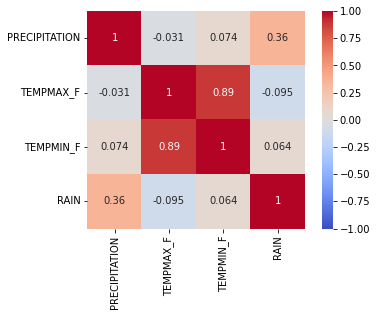

In [27]:
# Visualizing the correlation matrix as a heatmap.
weather_corr = sns.heatmap(df1_plot[["PRECIPITATION","TEMPMAX_F","TEMPMIN_F","RAIN"]].corr(),
                           vmin=-1, vmax=1, center=0,
                           annot=True, square=True, cmap = "coolwarm")

In [28]:
df_weather = df.drop(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
                      'WINDAVG','DAPR', 'EVAP', 'MDPR', 'PGTM', 'SNOW', 'SNWD',
                      'TOBS', 'WDF2', 'WDF5', 'WESD', 'WESF', 'WSF2', 'WSF5', 
                      'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 
                      'WT10', 'WT11'], axis=1)

In [29]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           1652 non-null   object 
 1   PRECIPITATION  1652 non-null   float64
 2   RAIN           1652 non-null   int64  
 3   TEMPAVG_F      1652 non-null   int64  
 4   TEMPMAX_F      1652 non-null   int64  
 5   TEMPMIN_F      1652 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 77.6+ KB


In [30]:
X = df_weather.iloc[:, [1,4,5]].values
y = df_weather.iloc[:, 2].values

In [31]:
from sklearn.model_selection import train_test_split
# Spit the data into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [32]:
# Fitting the Classifier
from sklearn.svm import SVC
classifier_svc = SVC(gamma='auto', kernel='linear', random_state = 42)
classifier_svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', random_state=42)

In [33]:
prediction = classifier_svc.predict(X_test)

 *****Analyzing the model with Confusion Matrix and Classification Report*****

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, prediction)
print('Confusion Matrix:', cm)
print('Accuracy Score:', accuracy_score(y_test, prediction))
print('\n')
print('Classification Report:',classification_report(y_test, prediction))

Confusion Matrix: [[337   1]
 [ 62  96]]
Accuracy Score: 0.8729838709677419


Classification Report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91       338
           1       0.99      0.61      0.75       158

    accuracy                           0.87       496
   macro avg       0.92      0.80      0.83       496
weighted avg       0.89      0.87      0.86       496



In [35]:
# Printing results for the Confusion Matrix
print('The model has predicted - there will be no rain for', cm[0,0] , 'days.')
print('The model has predicted - there will be rain for', cm[1,1] , 'days.')

The model has predicted - there will be no rain for 337 days.
The model has predicted - there will be rain for 96 days.


In [36]:
# Analyzing our model with cross validation to see if it predicts consistently
# Using the 5-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_svc, X_train, y_train, cv=5)
scores.mean() 

0.8779892521271832

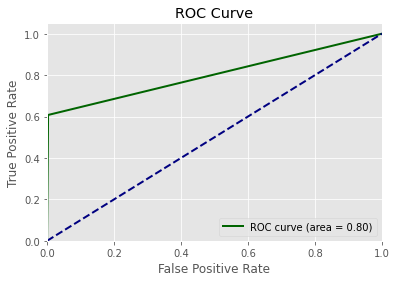

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# Measure the accuracy using the ROC
fpr_svc, tpr_svc, _ = roc_curve(y_test, prediction)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.figure()
plt.plot(fpr_svc, tpr_svc, color='darkgreen',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
# Fitting the Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [39]:
prediction1 = classifier_lr.predict(X_test)
# Analyzing our model with Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, prediction1)
print(cm)
print('Accuracy Score:', accuracy_score(y_test, prediction1))
print('\n')
print(classification_report(y_test, prediction1))

[[338   0]
 [ 70  88]]
Accuracy Score: 0.8588709677419355


              precision    recall  f1-score   support

           0       0.83      1.00      0.91       338
           1       1.00      0.56      0.72       158

    accuracy                           0.86       496
   macro avg       0.91      0.78      0.81       496
weighted avg       0.88      0.86      0.85       496



In [40]:
scores = cross_val_score(classifier_lr, X_train, y_train, cv=5)
scores.mean() 

0.8632818331094192

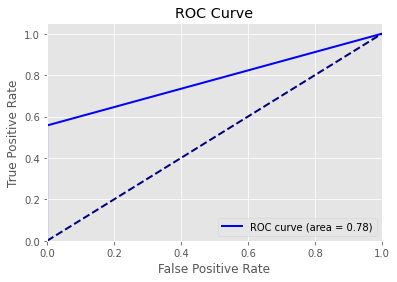

In [41]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, prediction1)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Fitting the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=42)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [43]:
prediction2 = classifier_rf.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, prediction2)
print(cm)
print('Accuracy Score:', accuracy_score(y_test, prediction2))
print('\n')
print(classification_report(y_test, prediction2))

[[337   1]
 [  0 158]]
Accuracy Score: 0.9979838709677419


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       338
           1       0.99      1.00      1.00       158

    accuracy                           1.00       496
   macro avg       1.00      1.00      1.00       496
weighted avg       1.00      1.00      1.00       496



In [45]:
# Printing results for the Confusion Matrix
print('The model has predicted - there will be no rain for', cm[0,0] , 'days.')
print('The model has predicted - there will be rain for', cm[1,1] , 'days.')

The model has predicted - there will be no rain for 337 days.
The model has predicted - there will be rain for 158 days.


In [46]:
# Evaluation the model with cross validation 
scores = cross_val_score(classifier_rf, X_train, y_train, cv=5)
scores.mean() 

0.9991341991341992

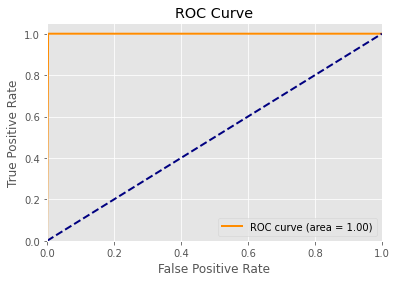

In [47]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, prediction2)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

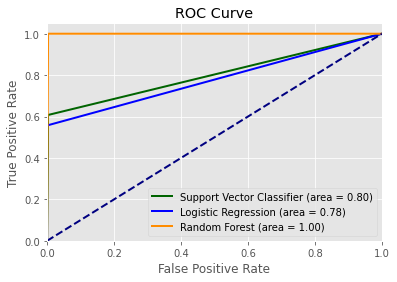

In [48]:
plt.figure()

plt.plot(fpr_svc, tpr_svc, color='darkgreen',
         lw=2, label='Support Vector Classifier (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_lr, tpr_lr, color='blue',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

***Lets build another model -- using Max and Min Temperatures only***

In [49]:
classifier_lr = LogisticRegression(random_state=42)

In [50]:
# Leaving out the Rain and Precipitation data
# Spit the data into 70% training and 30% testing set
X=df_weather.drop(['RAIN', 'DATE' ,'PRECIPITATION', 'TEMPAVG_F'],axis=1)
y=df_weather['RAIN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
classifier_lr.fit(X_train,y_train)
prediction3 = classifier_lr.predict(X_test)

In [52]:
cm = confusion_matrix(y_test, prediction3)
print(cm)
print('Accuracy Score:', accuracy_score(y_test, prediction3))
print('\n')
print(classification_report(y_test, prediction3))

[[320  28]
 [111  37]]
Accuracy Score: 0.719758064516129


              precision    recall  f1-score   support

           0       0.74      0.92      0.82       348
           1       0.57      0.25      0.35       148

    accuracy                           0.72       496
   macro avg       0.66      0.58      0.58       496
weighted avg       0.69      0.72      0.68       496



In [53]:
# Printing results for the Confusion Matrix
print('The model has predicted - there will be no rain for', cm[0,0] , 'days.')
print('The model has predicted - there will be rain for', cm[1,1] , 'days.')

The model has predicted - there will be no rain for 320 days.
The model has predicted - there will be rain for 37 days.


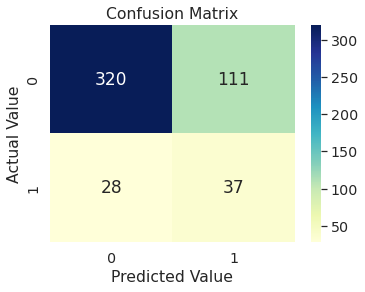

In [54]:
cm = pd.crosstab(prediction3, y_test, rownames=['Actual Value'], colnames=['Predicted Value'])
plt.figure(figsize=(5.5,4))
sns.set(context='notebook', font_scale=1.3, color_codes=True, palette='deep')
sns.heatmap(cm, annot=True, annot_kws={"size": 17}, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()

In [55]:
scores = cross_val_score(classifier_lr, X_train, y_train, cv=5)
scores.mean() 

0.7171070309001344

**Evaluating our Logistic Regression model with ROC Curve**

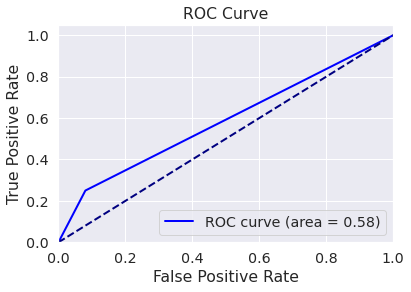

In [56]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, prediction3)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
X = df_weather['TEMPMIN_F'].values.reshape(-1,1)
y = df_weather['TEMPMAX_F'].values.reshape(-1,1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [60]:
print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

intercept: [29.62011356]
slope: [[0.83187474]]


***`The Slope and Intercept are important concept of Linear Regression. From the above we get 29.6201 intercept and 0.8319 slope. This means for every one unit of change in Min Temperature, the change in Max Temperature is about 0.83%.`***

In [61]:
y_pred = linreg.predict(X_test)

In [62]:
# Printing the prediction results
df_temp = pd.DataFrame({'Actual Temp': y_test.flatten(), 'Predicted Temp': y_pred.flatten()})
df_temp

,Actual Temp,Predicted Temp
0,84,78.700723
1,75,68.718227
2,95,93.674469
3,90,91.178845
4,67,57.071980
...,...,...
491,78,69.550101
492,93,91.178845
493,69,77.036974
494,85,74.541350


In [ ]:
df_temp1 = df_temp.head(20)
df_temp1.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

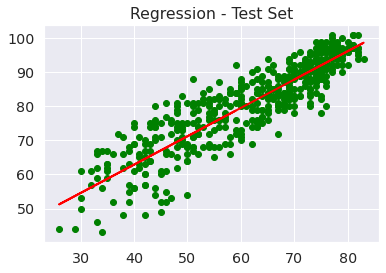

In [63]:
# Draw a Regression line on the Test Set
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression - Test Set')
plt.show()

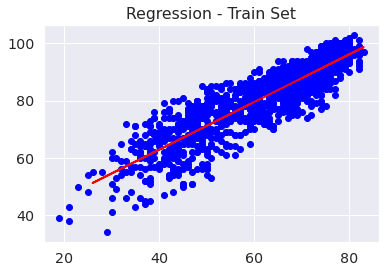

In [64]:
# Draw a Regression line on the Train Set
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression - Train Set')
plt.show()

In [65]:
from sklearn import metrics
# Calculate the coefficients
print('Coefficients: \n', linreg.coef_)
# Calculate the mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Calculate the mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
# Calculate the root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Calculate the R-squared (or coefficient of determinationnote. 1 is a perfect prediction.
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred))

Coefficients: 
 [[0.83187474]]
Mean Absolute Error: 4.325129418794831
Mean Squared Error: 30.631326853008346
Root Mean Squared Error: 5.53455751194333
Coefficient of Determination: 0.8013689908360337


*** 
- The MSE is the average of the square of the prediction errors. The larger the number, the larger is the error. We can see that the error is 30.63, so it is high. But there is not a correct value for the MSE. Of course, the lower the error, the better, and zero means the model is perfect. Since there is no correct answer, we cannot conclude that our prediction model is incorrect.
- The RMSE is the error rate by the square root of MSE. We can see that the RMSE is 5.53, which is about less than 15% of the 'mean' value of the percentage of all the temperature, i.e. 70.68. This means our algorithm did a decent job. It has made a fairly good prediction (We can see it in the bar plot above).
- The MAE is the difference between the original and predicted values extracted by the averaged absolute difference over the data. We can see that it is 4.32, and it is slightly smaller than the RMSE.
- The Coefficient of Determination is about 80%, which is fairly good. The higher the value the better is the model***

In [67]:
from sklearn.metrics import mean_squared_error as mse
y_pred = linreg.predict(X_test)
print("Mean Squared Error on Training Data --> {}\nMean Squared Error on Test Data --> {}".format(mse(y_train, linreg.predict(X_train)), mse(y_test, y_pred)))

Mean Squared Error on Training Data --> 34.6289269648249
Mean Squared Error on Test Data --> 30.631326853008346


**From the above performance measure, we got the mean squared errors on training and test data 34.6 and 30.6. This shows that the mean squared errors are closure between test and train datasets. This means the model tends to not overfitting the data.**

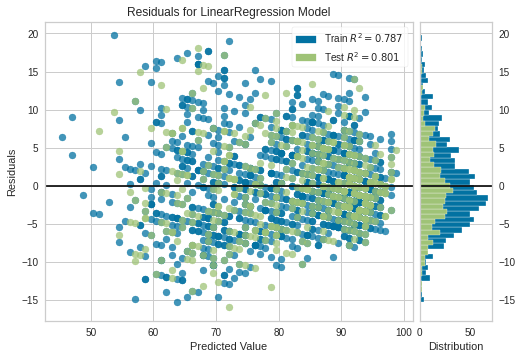

In [68]:
from yellowbrick.regressor import ResidualsPlot
# To understand it much further we plot the Residual Plot for this model.
visualizer = ResidualsPlot(linreg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()

***Lets do a Deep Learning Neural Networks for temperature prediction***

In [69]:
# Use Temperature data from Jan-01-2016 to July-09-2020
df_temp = df_weather[['TEMPAVG_F']]
df_temp.index = pd.to_datetime(df_weather[['DATE']].stack(), format='%m%d%y', errors='ignore')
df_temp.head()

,TEMPAVG_F
1/1/2016,48
1/2/2016,47
1/3/2016,49
1/4/2016,49
1/5/2016,45


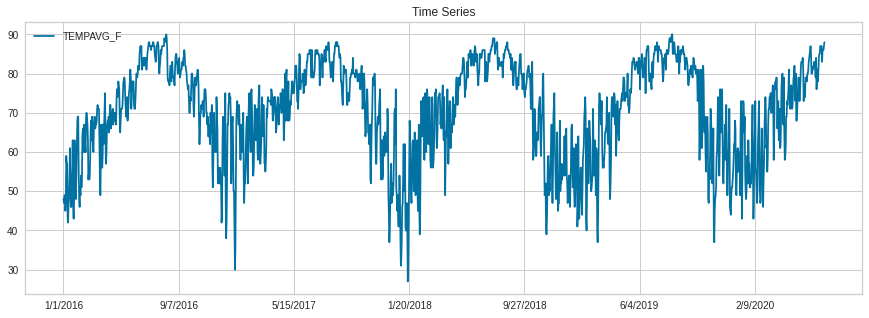

In [70]:
# Plot the Time Series for the Temperature
df_temp.plot(figsize=(15,5), title='Time Series')

In [71]:
# Split into training and test data
train_size = int(len(df_temp) * 0.8)
test_size = len(df_temp) - train_size
train, test = df_temp.iloc[0:train_size], df_temp.iloc[train_size:len(df_temp)]
print(len(train), len(test))

1321 331


In [72]:
# Scaling the data with MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(train[['TEMPAVG_F']])

train['TEMPAVG_F'] = scaler.transform(train[['TEMPAVG_F']])
test['TEMPAVG_F'] = scaler.transform(test[['TEMPAVG_F']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
# Creating sequences combining with time_steps
def create_sequences(X, y, time_steps=1):
    X_output, y_output = [], []
    for i in range(len(X) - time_steps):
        value = X.iloc[i:(i + time_steps)].values
        X_output.append(value)        
        y_output.append(y.iloc[i + time_steps])
    return np.array(X_output), np.array(y_output)

In [ ]:
# Use a history of 5 time steps to make our sequences
time_steps = 5
X_train, y_train = create_sequences(train, train.TEMPAVG_F, time_steps)
X_test, y_test = create_sequences(test, test.TEMPAVG_F, time_steps)
print(X_train.shape, y_train.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
73/73 [==============================] - 6s 19ms/step - loss: 6020.5840 - val_loss: 5304.3096
Epoch 2/50
73/73 [==============================] - 1s 8ms/step - loss: 4418.7896 - val_loss: 3855.2620
Epoch 3/50
73/73 [==============================] - 1s 9ms/step - loss: 3085.6523 - val_loss: 2620.4297
Epoch 4/50
73/73 [==============================] - 1s 7ms/step - loss: 2170.6157 - val_loss: 1919.7384
Epoch 5/50
73/73 [=============

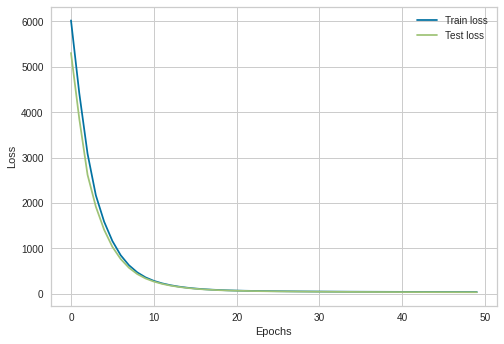

In [75]:
# Use the LSTM layer in a sequential model to make temperature predictions.
backend.clear_session()
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[0], X_train.shape[1])))
model.add(keras.layers.Dense(1))
# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(0.001))
model.summary()

# Train the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    batch_size=16, 
                    validation_data = (X_test, y_test),
                    verbose=1, 
                    shuffle=False)

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

results = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(results)

In [76]:
y_pred = model.predict(X_test)

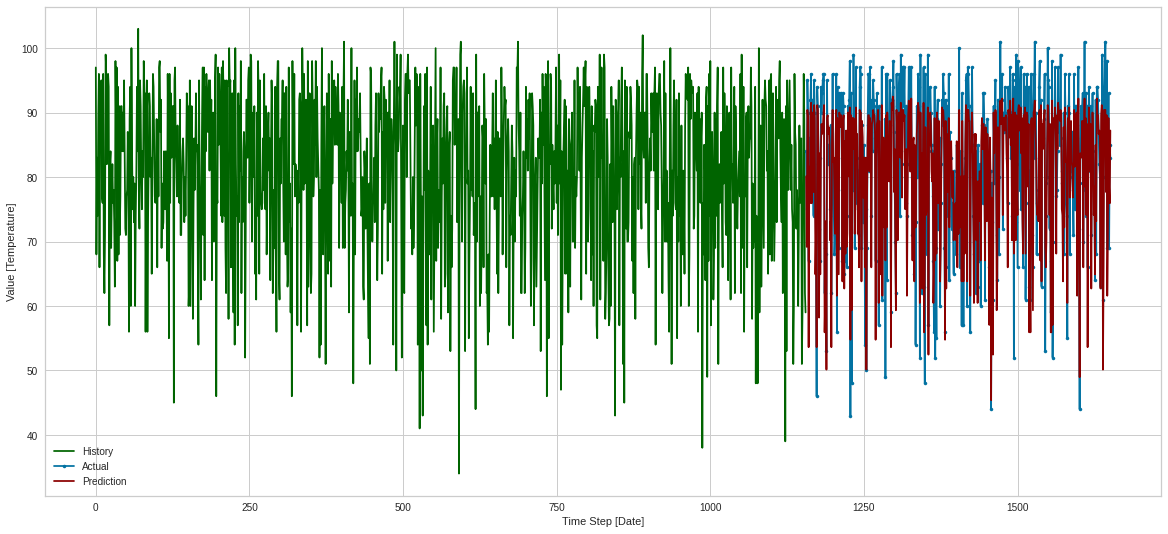

In [77]:
# Plot the predictions over the true (actual) values from the Time Series.
plt.figure(figsize=(20, 9))
plt.plot(np.arange(0, len(y_train)), y_train, 'darkgreen', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'darkred', label="Prediction")
plt.ylabel('Value [Temperature]')
plt.xlabel('Time Step [Date]')
plt.legend()
plt.show()

**From the above plot, the predictions over the true (actual) values from the Time Series look very good.**

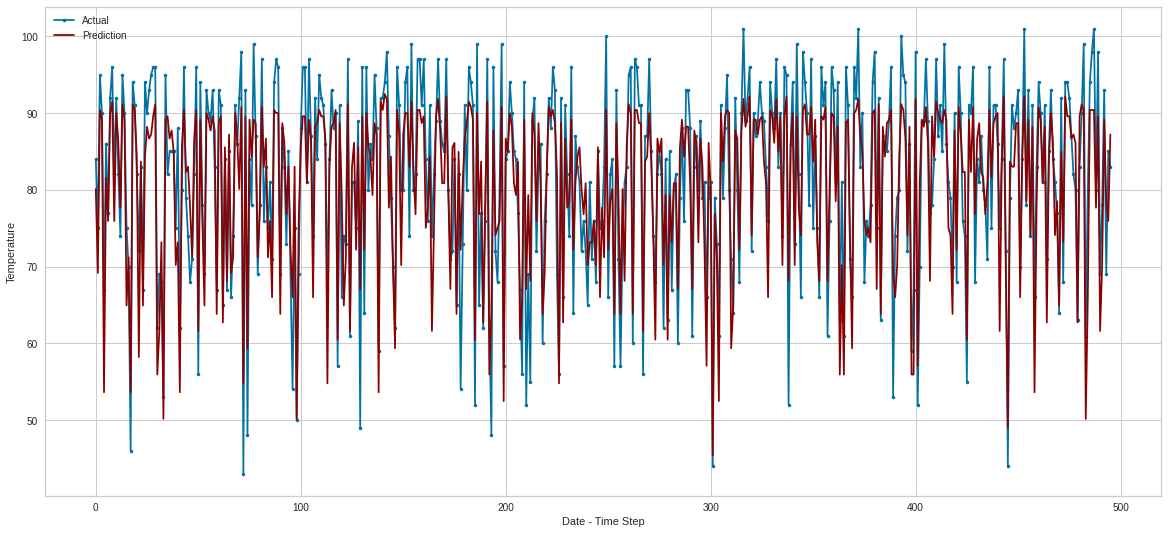

In [78]:
# Get a closer visualization of the predictions from the Time Series.
plt.figure(figsize=(20, 9))
plt.plot(y_test, marker='.', label="Actual")
plt.plot(y_pred, 'darkred', label="Prediction")
plt.ylabel('Temperature')
plt.xlabel('Date - Time Step')
plt.legend()
plt.show()

**
- Looking at the visualization plot, Time Series predicting with LSTM seems to be doing a great job of capturing the general pattern of the data. It does capture random fluctuations, which is good.
- The model was able to detect pattern over a period of times. It has picked up the annual trend of increasing value (temperature) as summer and decreasing temperature as winter.
- The graph patterns from our predicted temperature are closed to the actual. Our model did still indicate overall trends such as going up or down. The prediction has taught me that the LSTMs can be very effective in times series predicting/forecasting.
 
**